<a href="https://colab.research.google.com/github/AdityaKalkeri/Evaluation_Projects/blob/main/Project18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette('deep')

In [ ]:
from google.colab import files
upload = files.upload()

Saving worldometer_snapshots_April18_to_May18.csv to worldometer_snapshots_April18_to_May18.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(upload['worldometer_snapshots_April18_to_May18.csv']))
df.head(10)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0
6,2020-04-18,France,65256826,463662.0,151793.0,19323.0,35983.0,5833.0,96487.0
7,2020-04-18,Germany,83752855,1728357.0,143724.0,4538.0,85400.0,2922.0,53786.0
8,2020-04-18,Turkey,84230075,598933.0,82329.0,1890.0,10453.0,1894.0,69986.0
9,2020-04-18,Iran,83862642,330137.0,80868.0,5031.0,55987.0,3513.0,19850.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [ ]:
df.nunique()

Date                     31
Country                 213
Population              213
Total Tests            3173
Total Cases            3257
Total Deaths           1185
Total Recovered        2268
Serious or Critical     529
Active Cases           2680
dtype: int64

In [ ]:
df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

# Exploratory Data Analysis

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
pd.pivot_table(df, index = ['Country', 'Date']).head(10)

Active Cases  Population  ...  Total Recovered  Total Tests
Country     Date                                  ...                              
Afghanistan 2020-04-18         791.0    38817349  ...            112.0          NaN
            2020-04-19         832.0    38817349  ...            131.0       6422.0
            2020-04-20         855.0    38817349  ...            135.0       6422.0
            2020-04-21         906.0    38817349  ...            150.0       6422.0
            2020-04-22         970.0    38817349  ...            166.0       6422.0
            2020-04-23        1058.0    38817349  ...            179.0       6422.0
            2020-04-24        1120.0    38817349  ...            188.0       6422.0
            2020-04-25        1228.0    38817349  ...            188.0       7425.0
            2020-04-26        1274.0    38817349  ...            207.0       8090.0
            2020-04-27        1426.0    38817349  ...            220.0       8694.0

[10 rows x 7 columns]

Thus the values are cumulative

### World

In [ ]:
world = df.groupby("Date").sum().reset_index()

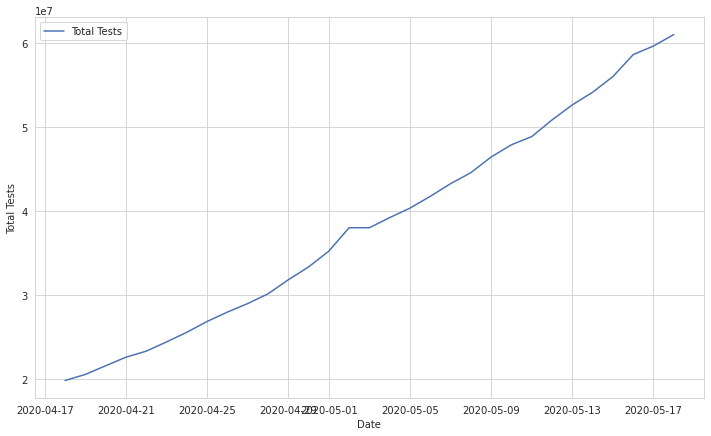

In [ ]:
plt.figure().set_size_inches(12,7)
sns.lineplot(x = 'Date', y = 'Total Tests', label = 'Total Tests', data = world)


Text(0, 0.5, 'Cases')

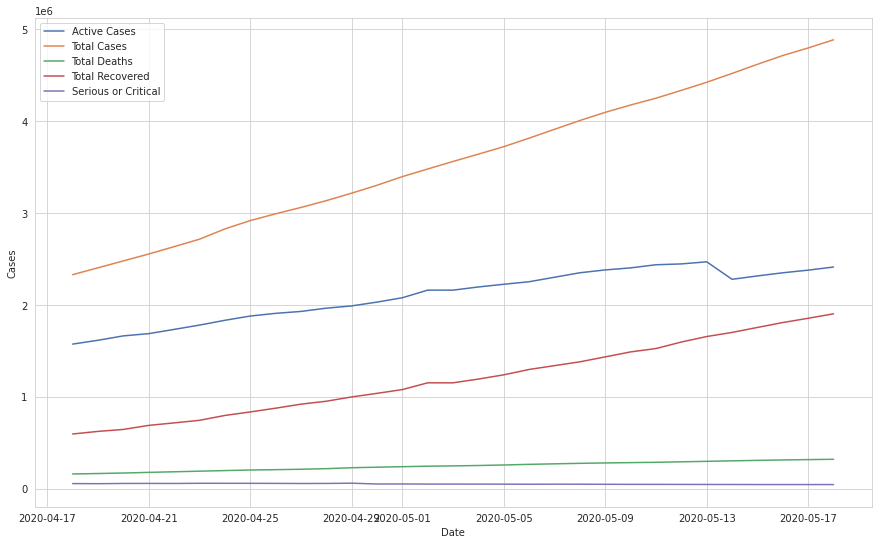

In [ ]:
plt.figure().set_size_inches(15,9)
sns.lineplot(x = 'Date', y = 'Active Cases', label = 'Active Cases', data = world)
sns.lineplot(x = 'Date', y = 'Total Cases', label = 'Total Cases', data = world)
sns.lineplot(x = 'Date', y = 'Total Deaths', label = 'Total Deaths', data = world)
sns.lineplot(x = 'Date', y = 'Total Recovered', label = 'Total Recovered', data = world)
sns.lineplot(x = 'Date', y = 'Serious or Critical', label = 'Serious or Critical', data = world)
plt.ylabel("Cases")

Total number of cases are increasing at a rapid rate, more than 3 million cases in a month

Active cases increased, then at a certain point dropped, then picked up again.

Recovery rate is getting closer and closer to number of active cases, and hopefully, people will recover early.

Deaths have been low, and death rate is increasing slowly

Critical cases are lower than deaths, and is a horizontal line.

Lets take a closer look at top 10 countries with highest no of cases

In [ ]:
df.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0
6602,2020-05-18,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0


In [ ]:
date = df[df['Date'] == pd.to_datetime('2020-05-18')]

In [ ]:
top10 = list(date.sort_values(by = 'Total Cases', ascending = False).head(15)['Country'].values)

In [ ]:
top = df[df['Country'].isin(top10)]

In [ ]:
top_ = pd.pivot_table(top, columns = ['Country'], index = ['Date'])['Total Cases']

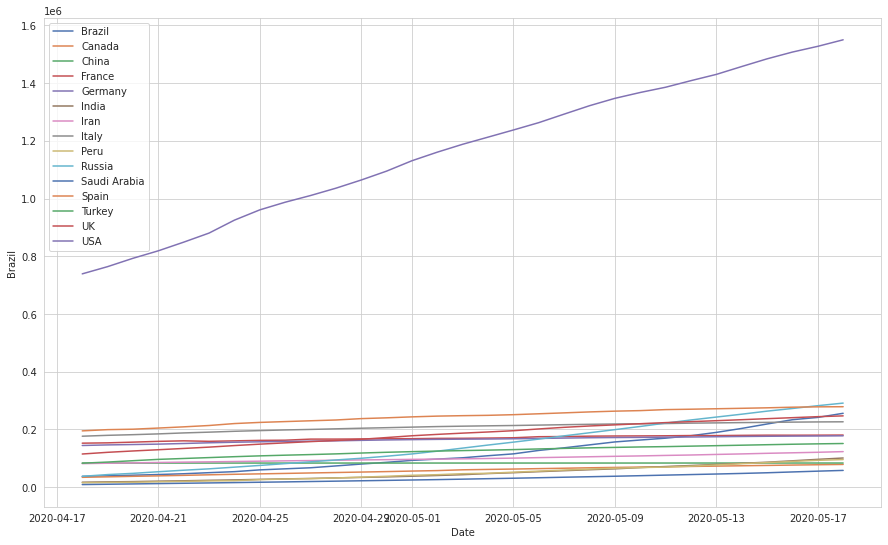

In [ ]:
plt.figure().set_size_inches(15,9)
for i in top_.columns:
  sns.lineplot(x = 'Date', y = i, data = top_, label = i, palette='viridis')

As we can see, US has substantially more COVID-19 cases than rest of the world, the main reason was mismanagement of the pandemic, people not following lockdown rules, allowing international travel till April, etc

Other countries rapidly implemented Lockdown and people followed social distancing, thus the numbers are much in control

In [ ]:
top_ = pd.pivot_table(top, columns = ['Country'], index = ['Date'])['Total Deaths']

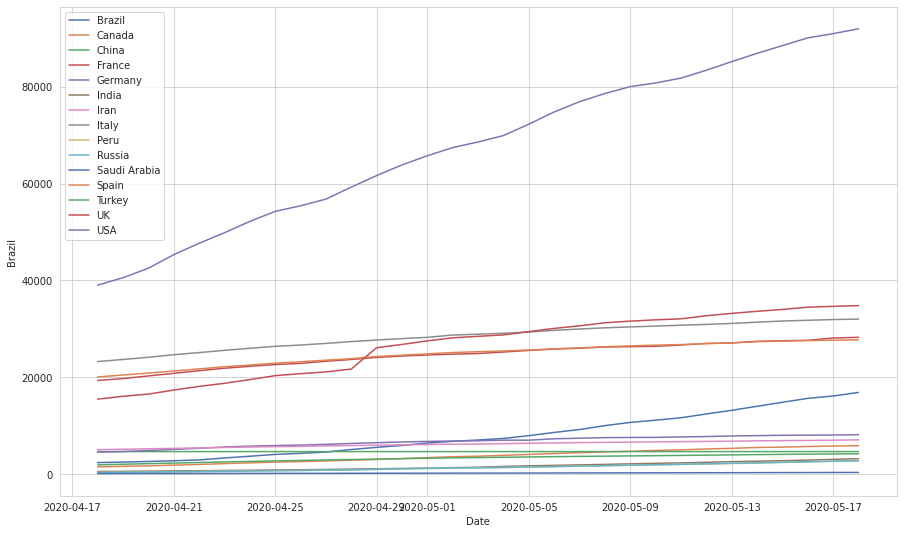

In [ ]:
plt.figure().set_size_inches(15,9)
for i in top_.columns:
  sns.lineplot(x = 'Date', y = i, data = top_, label = i, palette='viridis')

Here too, US has the most number of Deaths.

European Countries also have a high number of deaths, top being Italy, spain, UK, France

Lowest are Asian countries

Lets see in more detail:

In [ ]:
###USA###
usa = df[df['Country'] == 'USA']

In [ ]:
def plot(country):
  plt.figure().set_size_inches(15,7)
  for i in ['Active Cases', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Serious or Critical']:
    sns.lineplot(x = 'Date', y = i, data = country, label = i)

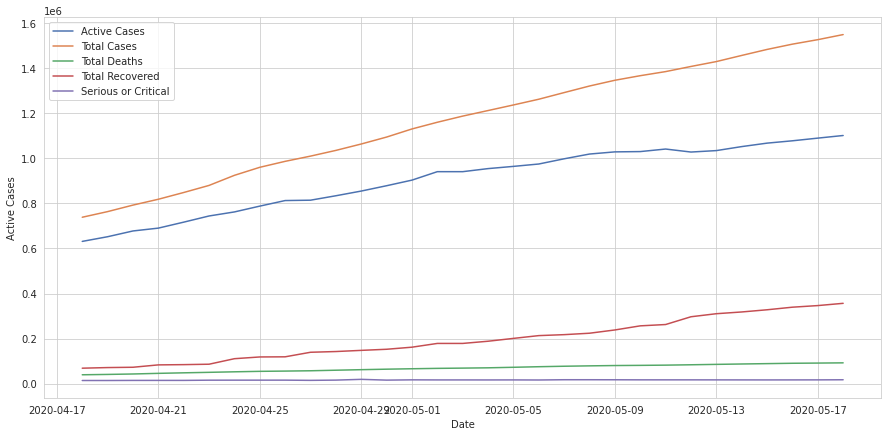

In [ ]:
plot(usa)

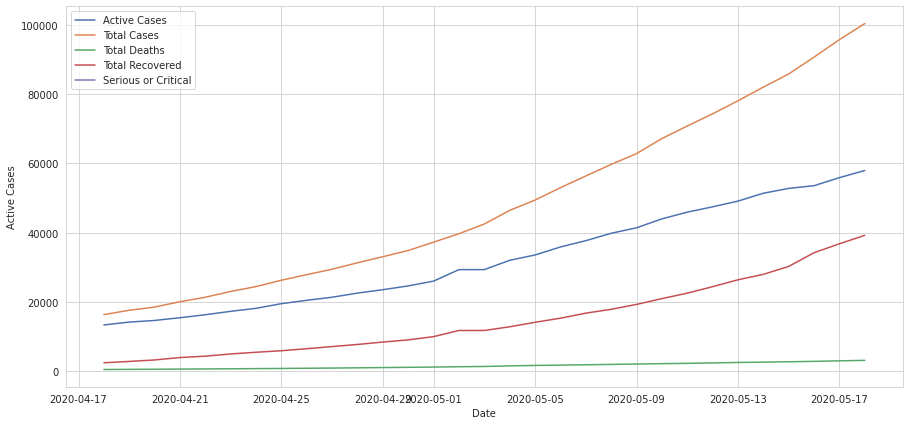

In [ ]:
india = df[df['Country'] == 'India']
plot(india)

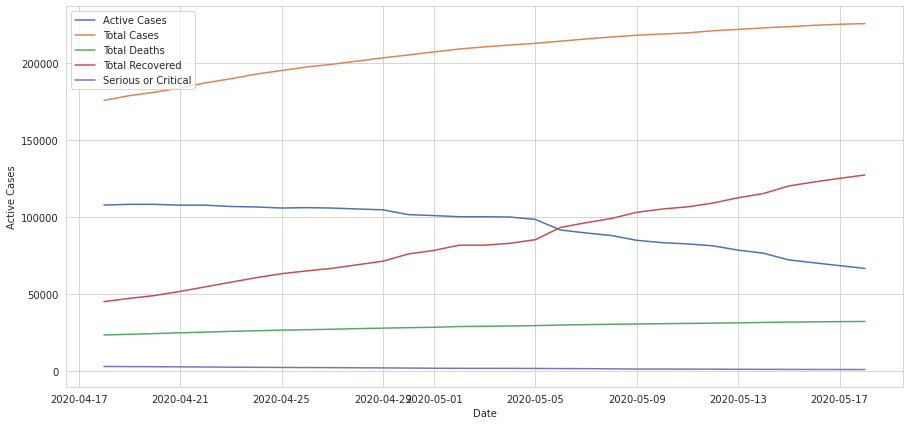

In [ ]:
italy = df[df['Country'] == 'Italy']
plot(italy)

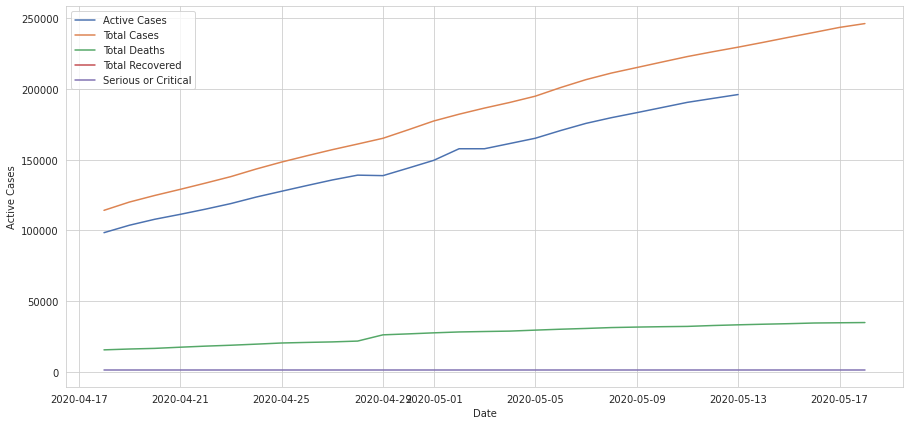

In [ ]:
uk = df[df['Country'] == 'UK']
plot(uk)

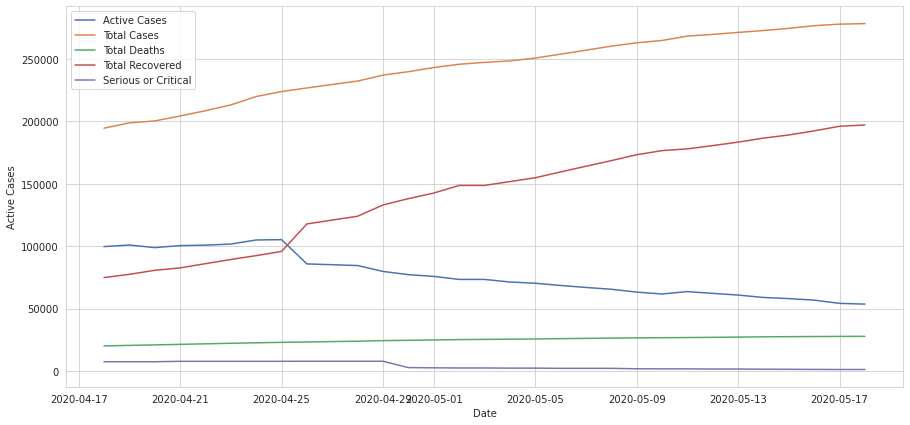

In [ ]:
spain = df[df['Country'] == 'Spain']
plot(spain)

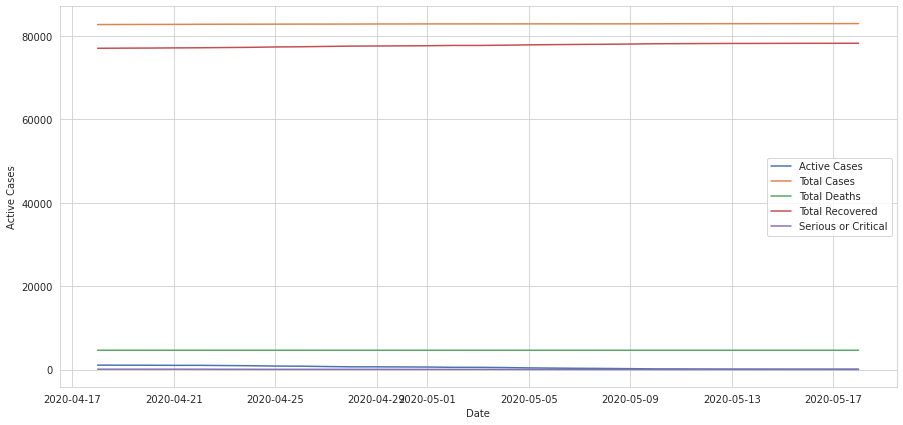

In [ ]:
china = df[df['Country'] == 'China']
plot(china)

China seems to have flattened the curve, as there is no increase in no of cases

# Model Building

We will build 2 models: 1 to predict total no of cases, next to predict Total deaths

In [ ]:
confirmed = df.groupby("Date")["Total Cases"].agg(np.sum).reset_index()
confirmed.columns = ['ds','y']
confirmed.head()

,ds,y
0,2020-04-18,2330045.0
1,2020-04-19,2405050.0
2,2020-04-20,2479782.0
3,2020-04-21,2555027.0
4,2020-04-22,2634998.0


In [ ]:
deaths = df.groupby("Date")["Total Deaths"].agg(np.sum).reset_index()
deaths.columns = ['ds', 'y']
deaths.head()

,ds,y
0,2020-04-18,160032.0
1,2020-04-19,164994.0
2,2020-04-20,170382.0
3,2020-04-21,177444.0
4,2020-04-22,184051.0


In [ ]:
from fbprophet import Prophet


In [ ]:
#total confirmed cases
cases = Prophet().fit(confirmed)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
future = cases.make_future_dataframe(periods = 150)        #Predicting what the confirmed cases would be for next 3 month
future.tail() 

,ds
176,2020-10-11
177,2020-10-12
178,2020-10-13
179,2020-10-14
180,2020-10-15


In [ ]:
forecast = cases.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
176,2020-10-11,18151059.0,5.005115e+06,3.149580e+07
177,2020-10-12,18239917.0,5.030095e+06,3.178050e+07
178,2020-10-13,18325229.0,5.035248e+06,3.198748e+07
179,2020-10-14,18413283.0,4.977399e+06,3.216392e+07
180,2020-10-15,18509616.0,4.934223e+06,3.243071e+07


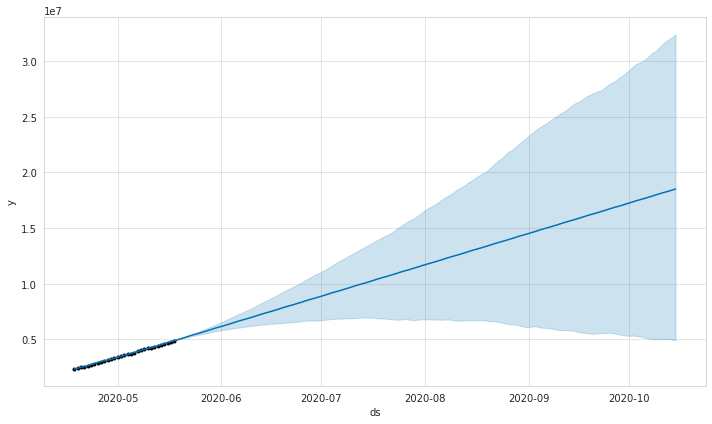

In [ ]:
cases_plot = cases.plot(forecast)

In [ ]:
death = Prophet().fit(deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
future  = death.make_future_dataframe(periods = 150)

In [ ]:
forecast = death.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
176,2020-10-11,1005893.0,-282634.766223,2.338036e+06
177,2020-10-12,1009338.0,-287280.510443,2.357679e+06
178,2020-10-13,1014652.0,-290063.323554,2.378353e+06
179,2020-10-14,1019966.0,-296258.625591,2.400743e+06
180,2020-10-15,1025283.0,-302558.642636,2.424101e+06


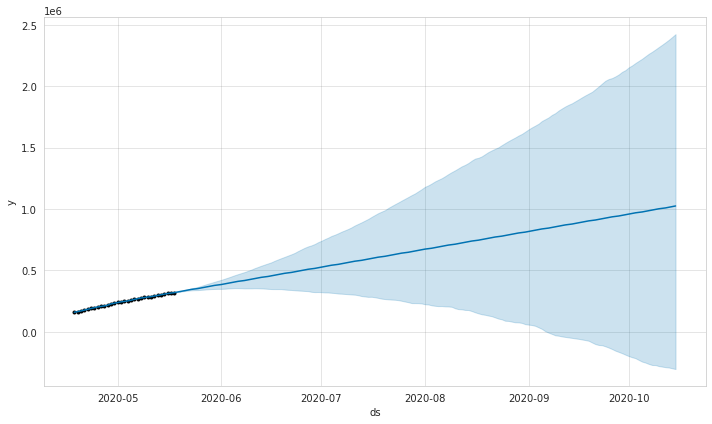

In [ ]:
death_plot = death.plot(forecast)

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(cases, 'Confirmed_cases.joblib')
joblib.dump(death, 'death_cases.joblib')

['death_cases.joblib']